# Projeto para demonstração de conhecimentos no algoritmo de KNN
## Vou trabalhar com um dataset disponível na Kaggle: https://www.kaggle.com/henriqueyamahata/bank-marketing?select=bank-additional-names.txt
## Vou utilizar alguns novos conceitos aprendidos no curso do Minerando Dados, para melhorar a versão v1 do projeto


In [1]:
#importando as principais biliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carregando a base de Dados

In [2]:
dataset = pd.read_csv("bank-additional-full.csv", delimiter=';')
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Convertendo a variável target Y em variavel numérica binária

In [3]:
# irei utilizar a função map, para mapear e fazer a mudança na variável
dataset['y'] = dataset['y'].map({'yes': 1, 'no': 0})
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# Visualizando a disparidade da Base, que é uma base DESBALANCEADA

0    36548
1     4640
Name: y, dtype: int64


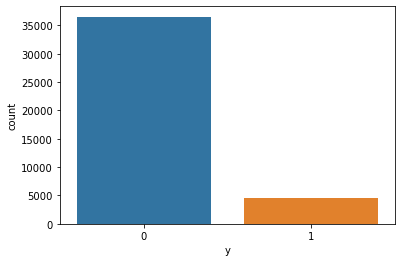

In [4]:
print(dataset.y.value_counts())
ax = sns.countplot(x="y", data=dataset)

# Vamos avaliar quais são as Features Categóricas, para avaliarmos qual técnica sera aplicada

In [5]:
# Pegando os tipos de dados no Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Avaliando se tem valores faltantes
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Vamos avaliar os valores contidos nas Features Categóricas

In [7]:
#identificando as instâncias existentes para os dados
dataset['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [8]:
#identificando as instâncias existentes para os dados
dataset['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [9]:
#identificando as instâncias existentes para os dados
dataset['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [10]:
#identificando as instâncias existentes para os dados
dataset['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [11]:
#identificando as instâncias existentes para os dados
dataset['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [12]:
#identificando as instâncias existentes para os dados
dataset['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [13]:
#identificando as instâncias existentes para os dados
dataset['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [14]:
#identificando as instâncias existentes para os dados
dataset['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

## As Features que tem mais de 3 classes, serão tratadas mais a frente

In [15]:
dataset["default"] = dataset["default"].map({"unknown": 0,"no":1,"yes":2})
dataset["housing"] = dataset["housing"].map({"unknown": 0,"no":1,"yes":2})
dataset["loan"] = dataset["loan"].map({"unknown": 0,"no":1,"yes":2})
dataset["contact"] = dataset["contact"].map({"cellular":0,"telephone":1})
dataset["poutcome"] = dataset["poutcome"].map({"nonexistent": 0, "failure":1, "success":2})

# As Features Month e Day_of_week, são features temporais

In [16]:
#identificando as instâncias existentes para os dados
dataset['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [17]:
dataset.month = pd.to_datetime(dataset.month, format = "%b").dt.month

In [18]:
#identificando as instâncias existentes para os dados
dataset['month'].value_counts()

5     13769
7      7174
8      6178
6      5318
11     4101
4      2632
10      718
9       570
3       546
12      182
Name: month, dtype: int64

In [19]:
#identificando as instâncias existentes para os dados
dataset['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [20]:
dataset.day_of_week = dataset.day_of_week.map({"mon": 0, "tue":1, "wed":2, "thu":3, "fri":4})

In [21]:
#identificando as instâncias existentes para os dados
dataset['day_of_week'].sort_values().value_counts()

3    8623
0    8514
2    8134
1    8090
4    7827
Name: day_of_week, dtype: int64

In [22]:
#Checando novamente se existe valores nulos
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Vamos analisar a correlação dos dados

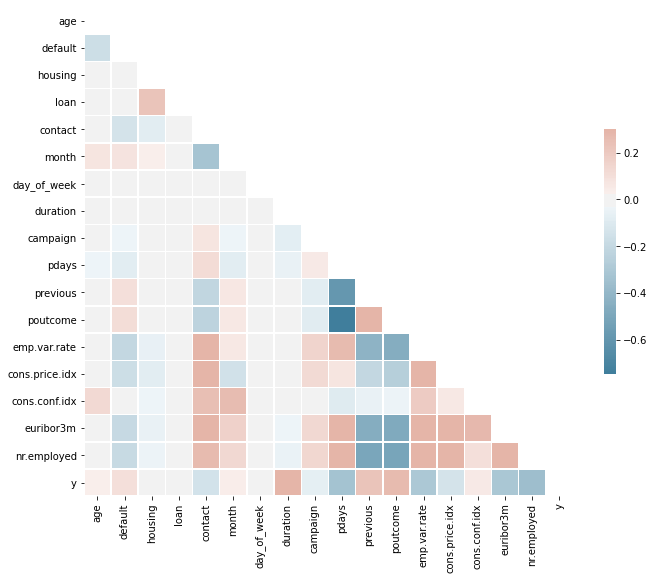

In [23]:
#sns.set_theme(style="white")
# Compute the correlation matrix
corr = dataset.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Aplicando o Get_Dummies, para tratar as classes categóricas remanescentes

In [24]:
dataset = pd.get_dummies(dataset)
dataset.head()

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,1,1,1,1,5,0,261,1,999,...,0,0,1,0,0,0,0,0,0,0
1,57,0,1,1,1,5,0,149,1,999,...,0,0,0,0,0,1,0,0,0,0
2,37,1,2,1,1,5,0,226,1,999,...,0,0,0,0,0,1,0,0,0,0
3,40,1,1,1,1,5,0,151,1,999,...,0,0,0,1,0,0,0,0,0,0
4,56,1,1,2,1,5,0,307,1,999,...,0,0,0,0,0,1,0,0,0,0


### Quando aplicado o comando get_dummies, ele matrizes de correlação com uns e zeros para representar os valores categóricos.
### Visualizando o info novamente podemos ver que agora temos novas colunas cujos nomes eram elementos das features que possuiam mais de 3 classes, essas novas colunas são do tipo unit8

In [25]:
# Pegando os tipos de dados no Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   default                        41188 non-null  int64  
 2   housing                        41188 non-null  int64  
 3   loan                           41188 non-null  int64  
 4   contact                        41188 non-null  int64  
 5   month                          41188 non-null  int64  
 6   day_of_week                    41188 non-null  int64  
 7   duration                       41188 non-null  int64  
 8   campaign                       41188 non-null  int64  
 9   pdays                          41188 non-null  int64  
 10  previous                       41188 non-null  int64  
 11  poutcome                       41188 non-null  int64  
 12  emp.var.rate                   41188 non-null 

# Com base na experiencia adquirida no "Bank_Procet_v1" 
### Vamos criar um modelo simples como baseLine com K=20
### Vamos fazer um gridSearch com K entre 15 e 25

## Dividindo em dados de treino e teste

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('y',axis=1),dataset['y'],test_size=0.3, random_state = 1,stratify= dataset['y'])

# Criando o Modelo BaseLine

In [27]:
# Instanciando o baseline
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)

# Treinando o Modelo

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

# Fazendo as classificações com os dados de Teste

In [29]:
resultado = knn.predict(X_test)
resultado

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Checando a acurácia do modelo

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, resultado)

0.9126810714574735

# **Relatório de Classificação**

- *Estamos com um recall para a classe 1 baixo*

Isso pode ser justificado devido a base estar desbalanceada com relação a classe 1

In [31]:
print (classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.66      0.47      0.55      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.72      0.75     12357
weighted avg       0.90      0.91      0.91     12357



# **Matriz de confusão**

- *Estamos errando mais do que acertando a classificação para a classe 1*

In [32]:
print (pd.crosstab(y_test, resultado, rownames=['Real'], colnames=['    Predito'], margins=True))

    Predito      0     1    All
Real                           
0            10619   346  10965
1              733   659   1392
All          11352  1005  12357


# Problemas de bases desbalanceadas podemos utilizar duas abordagens, a primeira (Undersampling) retiramos dados da classe que esta em maior quantidade e a segunda (Oversampling) aumentamos a quantidade de dados para a classe que esta em menor quantidade

### **Aplicando NearMiss:**

*   Iguala as quantidade de amostras entre as classes.

In [33]:
# para utilizar esse método é preciso utilizar a biblioteca imblearn, que é considerada um complemento da Skeatlearning
from imblearn.under_sampling import NearMiss

In [34]:
# instanciando o método
nr = NearMiss()

In [35]:
X_under, y_under = nr.fit_sample(dataset.drop('y',axis=1),dataset['y'])

# Avaliando as quantidades das classes

1    4640
0    4640
Name: y, dtype: int64


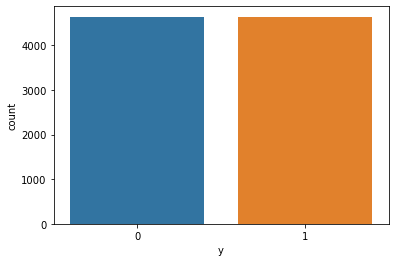

In [36]:
print(y_under.value_counts())
ax = sns.countplot(x=y_under)

# Separação em dados de treino e teste

In [37]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under,y_under,test_size=0.3, random_state = 1, stratify=y_under)

# Treinando novo modelo

In [38]:
knn.fit(X_train_under,y_train_under)

KNeighborsClassifier(n_neighbors=20)

# Fazendo as classificações com os dados de teste

In [39]:
resultado_under = knn.predict(X_test_under)

# Checando a acurácia e outras métricas de classificação

*   Houve uma redução na acurácia do modelo;
*   O recall da classe 1 melhorou 57,4%;
*   Agora o modelo acerta 73,7% dos casos da classe 1.

In [40]:
accuracy_score(y_test_under, resultado_under)

0.8074712643678161

In [41]:
print (classification_report(y_test_under, resultado_under))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1392
           1       0.86      0.74      0.79      1392

    accuracy                           0.81      2784
   macro avg       0.81      0.81      0.81      2784
weighted avg       0.81      0.81      0.81      2784



In [42]:
print (pd.crosstab(y_test_under, resultado_under, rownames=['Real'], colnames=['    Predito'], margins=True))

    Predito     0     1   All
Real                         
0            1221   171  1392
1             365  1027  1392
All          1586  1198  2784


### **Aplicando o SMOTE (Synthetic Minority Over-sampling Technique)**


*   Gera dados sintéticos da classe minoritária.

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
# Inicialmente vou criar novos dados, mas irei manter uma diferença de 50%. Isso serve para evitar overfitting
smt = SMOTE(sampling_strategy=0.5)

**Aplica o SMOTE nos dados**

In [47]:
X_over, y_over = smt.fit_sample(dataset.drop('y',axis=1),dataset['y'])

0    36548
1    18274
Name: y, dtype: int64


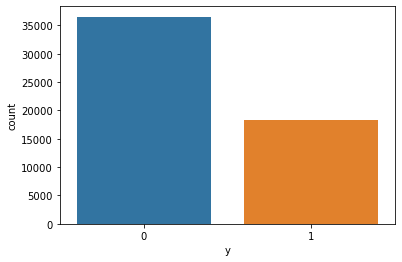

In [48]:
print(y_over.value_counts())
ax = sns.countplot(x=y_over)

# Separação em dados de treino e teste

In [49]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over,y_over,test_size=0.3, random_state = 1, stratify=y_over)

# Treinando novo modelo

In [50]:
knn.fit(X_train_over,y_train_over)

KNeighborsClassifier(n_neighbors=20)

# Fazendo as classificações com os dados de teste

In [51]:
resultado_over = knn.predict(X_test_over)

# Checando a acurácia e outras métricas de classificação

*   Houve uma redução na acurácia do modelo;
*   O recall da classe 1 melhorou 83%;
*   Agora o modelo acerta 86,02% dos casos da classe 1.

In [52]:
accuracy_score(y_test_over, resultado_over)

0.8825317687116191

In [53]:
print (classification_report(y_test_over, resultado_over))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10965
           1       0.80      0.86      0.83      5482

    accuracy                           0.88     16447
   macro avg       0.86      0.88      0.87     16447
weighted avg       0.89      0.88      0.88     16447



In [54]:
print (pd.crosstab(y_test_over, resultado_over, rownames=['Real'], colnames=['    Predito'], margins=True))

    Predito      0     1    All
Real                           
0             9799  1166  10965
1              766  4716   5482
All          10565  5882  16447


# **Visualizando as diferentes proproções das bases de dados**

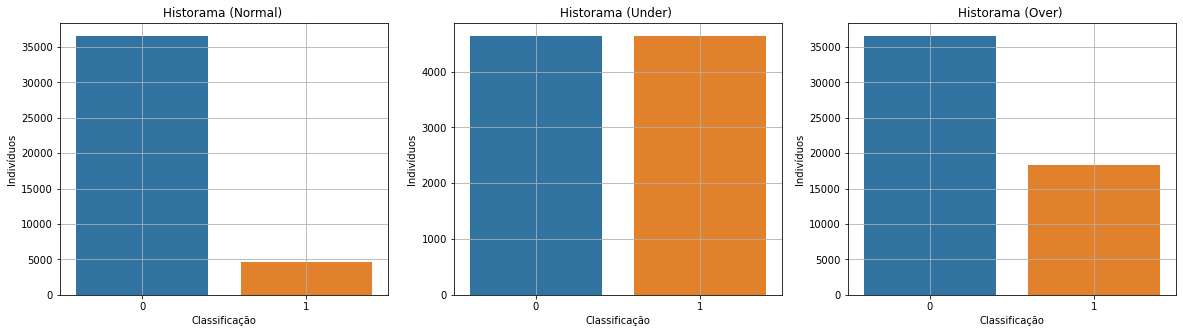

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols =3, figsize = (20, 5));
ax1 = sns.countplot(ax = ax1,x=dataset['y'])
ax1.set(xlabel='Classificação', ylabel='Indivíduos',title='Historama (Normal) ')
ax1.grid()
#ax1.legend(['Yes cases']);


ax2 = sns.countplot(ax = ax2,x=y_under)
ax2.set(xlabel='Classificação', ylabel='Indivíduos',title='Historama (Under) ')
ax2.grid()
#ax2.legend(['No Cases']);

ax3 = sns.countplot(ax = ax3,x=y_over)
ax3.set(xlabel='Classificação', ylabel='Indivíduos',title='Historama (Over) ')
ax3.grid()

plt.show()

## Podemos testar diferentes proporções no Oversampling, de modo a se certificar que estamos com o melhor parâmetro, mas sempre tendo noção que criar muitos dados novos pode gerar um overfitting no modelo

# 

# Para continuar esse Script, irei testar diferentes valores de K, com os dados do Oversampling. Vou fazer isso para avaliar o quanto esse valor do K está influenciando na resposta do modelo

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
k_list = list(range(1,31))
k_values = dict(n_neighbors=k_list)

In [65]:
grid_res = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

In [66]:
grid_res.fit(X_over,y_over)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=20),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [67]:
print("Melhor valor de k = {} com o valor {} de acurácia".format(grid_res.best_params_,grid_res.best_score_))

Melhor valor de k = {'n_neighbors': 30} com o valor 0.825268932208265 de acurácia


In [68]:
scores=[]
for score in grid_res.cv_results_['mean_test_score']:
    #print(score)
    scores.append(score)

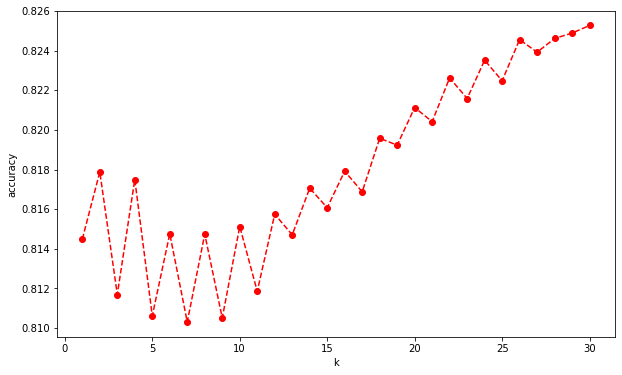

In [69]:
plt.figure(figsize=(10,6))
plt.plot(k_list,scores,color='red',linestyle='dashed',marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()